## 1 *Importando modulos e Bibliotecas*

In [1]:
import pandas as pd
import datetime 
import yfinance as yf
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick 
import mplcyberpunk
from bcb import currency
from bcb import sgs
import smtplib
from email.message import EmailMessage

## 2 *Importando Dados*

In [2]:
# Importando os dados da API yahoo finance
ativos = ["^BVSP", "BRL=X"]

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

display(dados_mercado)


[*********************100%%**********************]  2 of 2 completed


Adj Close                  Close                   High  \
               BRL=X          ^BVSP   BRL=X          ^BVSP   BRL=X   
Date                                                                 
2022-09-21    5.1415  111936.000000  5.1415  111936.000000  5.1840   
2022-09-22    5.1704  114070.000000  5.1704  114070.000000  5.1830   
2022-09-23    5.1155  111716.000000  5.1155  111716.000000  5.2388   
2022-09-26    5.2588  109114.000000  5.2588  109114.000000  5.3889   
2022-09-27    5.3894  108376.000000  5.3894  108376.000000  5.3939   
...              ...            ...     ...            ...     ...   
2023-09-15    4.8682  118758.000000  4.8682  118758.000000  4.8754   
2023-09-18    4.8670  118288.000000  4.8670  118288.000000  4.8726   
2023-09-19    4.8537  117846.000000  4.8537  117846.000000  4.8625   
2023-09-20    4.8658  118695.000000  4.8658  118695.000000  4.8679   
2023-09-21       NaN  116805.867188     NaN  116805.867188     NaN   

                               Low                   Open                \
                   ^BVSP     BRL=X          ^BVSP   BRL=X         ^BVSP   
Date                                                                      
2022-09-21  113294.00000  5.120462  111380.000000  5.1415  112517.00000   
2022-09-22  114392.00000  5.118380  111819.000000  5.1704  111942.00000   
2022-09-23  112457.00000  5.112680  110732.000000  5.1155  112258.00000   
2022-09-26  111713.00000  5.255300  109022.000000  5.2588  111713.00000   
2022-09-27  110161.00000  5.295532  108120.000000  5.3894  109122.00000   
...                  ...       ...            ...     ...           ...   
2023-09-15  119780.00000  4.857700  118666.000000  4.8682  119393.00000   
2023-09-18  119486.00000  4.842462  118123.000000  4.8670  118759.00000   
2023-09-19  118458.00000  4.835390  117628.000000  4.8537  118293.00000   
2023-09-20  119616.00000  4.838740  117847.000000  4.8658  117864.00000   
2023-09-21  118695.09375       NaN  116805.867188     NaN  118695.09375   

           Volume              
            BRL=X       ^BVSP  
Date                           
2022-09-21    0.0  14726800.0  
2022-09-22    0.0  15684400.0  
2022-09-23    0.0  13542300.0  
2022-09-26    0.0  13127000.0  
2022-09-27    0.0  14517500.0  
...           ...         ...  
2023-09-15    0.0  16107600.0  
2023-09-18    0.0  11273100.0  
2023-09-19    0.0  11453800.0  
2023-09-20    0.0   9238800.0  
2023-09-21    NaN         0.0  

[262 rows x 12 columns]

In [3]:
# Importando os Dados da API do BC
selic = sgs.get({'selic':432}, start = '2021-01-01')

selic

,selic
Date,
2021-01-01,2.00
2021-01-02,2.00
2021-01-03,2.00
2021-01-04,2.00
2021-01-05,2.00
...,...
2023-09-17,13.25
2023-09-18,13.25
2023-09-19,13.25


## 3 *Manipulando os Dados - Seleção e exclusão* 

In [4]:
# Manipulando os dados excluindo colunas inexistentes e selecionar colunas desejadas

dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ['Dolar', 'Ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,Dolar,Ibovespa
Date,,
2022-09-21,5.1415,111936.0
2022-09-22,5.1704,114070.0
2022-09-23,5.1155,111716.0
2022-09-26,5.2588,109114.0
2022-09-27,5.3894,108376.0
...,...,...
2023-09-14,4.9154,119392.0
2023-09-15,4.8682,118758.0
2023-09-18,4.8670,118288.0


## 3.1 *Manipulando Criando tabelas*

In [6]:
# Criação de Tabelas Anuais de Fechamento

dados_fechamento_anual = dados_fechamento.resample("Y").last()

dados_fechamento_anual

,Dolar,Ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,4.8658,118695.0


In [7]:
selic = sgs.get({'selic':432}, start = '2021-01-01').resample("Y").last()

selic

,selic
Date,
2021-12-31,9.25
2022-12-31,13.75
2023-12-31,12.75


## 4 *Calculando Fechamento Anual, Retorno no ano até o Momento.*

In [9]:
# Criando variáveis para calcular retornos Anuais
retorno_no_ano = dados_fechamento_anual.pct_change().dropna()

retorno_no_ano

,Dolar,Ibovespa
Date,,
2023-12-31,-0.076137,0.078741


In [10]:
selic = sgs.get({'selic':432}, start = '2021-01-01').resample("Y").last().pct_change().dropna()

selic

,selic
Date,
2022-12-31,0.486486
2023-12-31,-0.072727


## 5 *Localizar o Fechamento e Retorno baseado no Ano.*

In [11]:
# loc > referencia elementos a partir do nome 
# iloc > referencia elementos como uma matriz
retorno_no_ano.loc["2023-12-31"]

Dolar      -0.076137
Ibovespa    0.078741
Name: 2023-12-31 00:00:00, dtype: float64

In [12]:
selic = sgs.get({'selic':432}, start = '2021-01-01').resample("Y").last().pct_change().dropna().loc["2023-12-31"]

selic

selic   -0.072727
Name: 2023-12-31 00:00:00, dtype: float64

In [13]:
retorno_ano_dolar = retorno_no_ano.iloc[-1, 0]
retorno_ano_ibovespa = retorno_no_ano.iloc[-1, 1]

retorno_ano_dolar

-0.07613731838396132

In [14]:
retorno_ano_dolar = round(retorno_ano_dolar * 100, 2)
retorno_ano_ibovespa = round(retorno_ano_ibovespa * 100, 2)

retorno_ano_ibovespa

7.87

In [16]:
selic = round(-0.072727 * 100, 2)

selic


-7.27

## 6 *Fazendo Gráficos e Performance dos Ativos.*

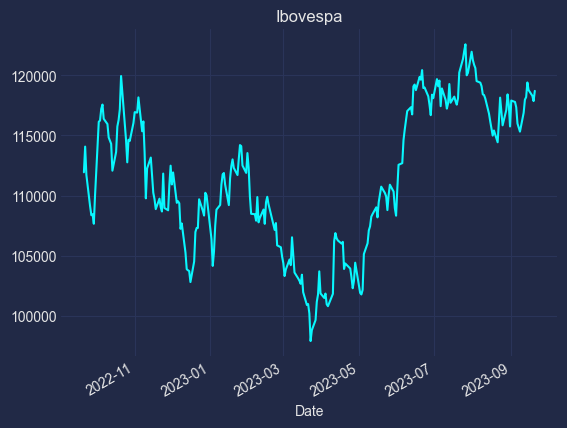

In [17]:
# Criação dos Gráficos para melhor Visualização
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Ibovespa', use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('Ibovespa.png', dpi = 300)

plt.show()

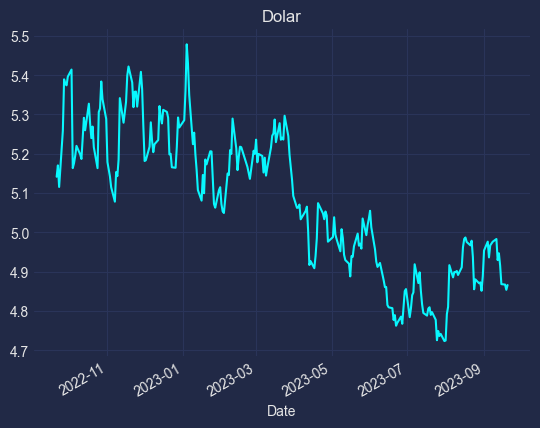

In [18]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Dolar', use_index = True, legend = False)

plt.title("Dolar")

plt.savefig('Dolar.png', dpi = 300)

plt.show()

In [ ]:
selic = sgs.get({'selic':432}, start = '2021-01-01')

selic

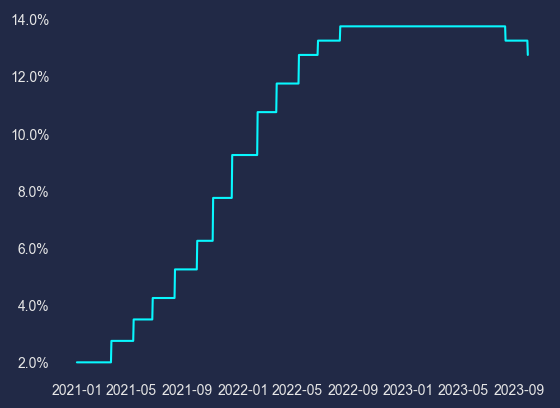

In [20]:
fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(selic.index, selic['selic'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(False)

plt.savefig('selic.png', dpi = 300)

plt.show()

## 7 *Automatizando o Envio do Relatório*

In [ ]:
# Automatizando o Envio dos Dados para o Gestor
import os
from dotenv import load_dotenv

In [ ]:
load_dotenv()

In [ ]:
senha = os.environ.get("senha_email")
email = 'seu_E-mail'

In [ ]:
msg = EmailMessage()
msg['Subject'] = "Enviando e-mail com o Python"
msg['from'] = 'seu_Email'
msg['to'] = 'email_gestor'

msg.set_content(f'''Prezado Gestor, segue o relatório diário:


Bolsa: 

No Ano o Ibovespa está tendo até o momento uma rentabilidade de {retorno_ano_ibovespa}%,

Dólar:

No Ano o Dolar está tendo uma rentabilidade de {retorno_ano_dolar}%,

Selic:

No Ano a Selic está tendo uma rentabilidade de {selic}%

Insight

Com Base nos Dados levantados o ativo que vem se Performando positivamente é o Ibovespa,
levando em consideração a possivel queda dos juros, após decisão e projeções do Banco central,
ou seja Ativos ou fundos de renda variável podem ser uma boa escolha.

Abs,

''')


                                                    

In [ ]:
with open('Ibovespa.png' 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='Ibovespa.png')

with open('Dolar.png' 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='Dolar.png')

with open('selic.png' 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='selic.png')



In [ ]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:

    smtp.login(email, senha)
    smtp.send_message(msg)